<span style="font-size: 20px; font-weight: bold; color: red">[ALVES] Teste 4</span>

In [ ]:
%pip install -e .

### **Radares Escolhidos**:
Os códigos abaixo digitados foram feitos utilizando como exemplo o arquivo example.ipynb que conta na raiz da pasta rf.
Para o TESTE 4 foram escolhidos os seguintes sistemas:

- Radar AN/APG 68, radar aeroembarcado utilizado na aeroanve f-16; e

- Radar AN/TPS 77, radar transportável 3D para vigilância de longo alcance.

<span style="font-size: 20px; font-weight: bold" >Parâmetros do Radar AN/APG 68:</span>

- Para a potência de pico, foi utilizado o folder da Northrop Grumman onde está especificado a potência de 5.6 KW;

- Para a frequência, utilizou-se o link https://www.detailedpedia.com/wiki-AN/APG-68, onde foi encontrada a freq de 9.86 GHz;

- Para a forma de onda, utilizou-se a referência que constam na Tabela 5.2 do livro Radar Handbook (Skolnik, 2008). Nesse caso, considerando que o radar estaria executando a função Active Track, sendo definidos os seguintes parâmetros com base essa referência:

    PRF: 200 kHz
    PW: 20e-6 s
    BW: 1e-6

- O valor de Noise Figure foi definido com base nos exemplos apresentados nas implementações em Python que constam no livro "Introduction to Radar Using Python and MATLAB" de Harrisson, 2020.

    Noise Figure: 6 db

- Para o ganho da antenna, o valor foi ajustado com o objetivo de se achar uma distância de detecção de  aproximadamente 20 mn, que corresponde ao encontrado no papper "F-16 Pulse Doppler Radar (AN/APG-66) Performance" aliado à informação disponível em https://www.radartutorial.eu/19.kartei/08.airborne/karte024.pt.html, que declara que o radar APG 68 possui uma performance cerca de 30% maior que o APG-66. Nesse caso, a distância de detecção considerando uma SNR de 10 db fica em torno de 26 nm.


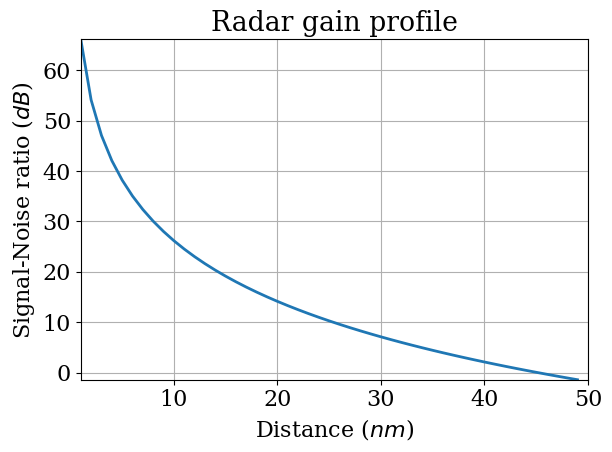

In [7]:
from math import radians
from rf.radar.component import Radar, Target
from rf.radar.equation import get_snrs
from rf.radar.chart import plot_snrs

# Parâmetro do alvo
target = Target(
    rcs = 1.3                                  # [m^2] => 2 m^2
)

# Parâmetros do radar
radar = Radar(
    peak_power=5606,                        # [W]     => 5.606 KW
    antenna_gain=21,                         # [dB]    => 21 dB
    frequency= 9.6e9,                        # [Hz]    => 9600 MHz
    noise_figure=6,                          # [dB]    => 6 dB
    band_width=1.0e6,                        # [Hz]    => 1.00 MHz
    pulse_width=20e-6,                      # [s]     => 200 usec
    pulse_repetition=200e3,                    # [Hz]    => 200 kHz
    beam_width=radians(1.3),                 # [rad]   => 1.3 degrees
    angular_velocity=radians(6 * 120)/60.0 # [rad/s] => 6 rpm
)

# Parâmetros adicionais
losses = 15                                  # 15 dB

from rf.radar.chart import plot_snrs

figure, _ = plot_snrs(
    1.0, 50.0, 1.0,
    radar,
    target,
    losses,
)

<span style="font-size: 20px; font-weight: bold" >Parâmetros do Radar AN/TPS 77:</span>

- Utilizou-se como referência o Folder da Lockheed Martin disponível em https://www.lockheedmartin.com/content/dam/lockheed-martin/rms/documents/ground-based-air-surveillance-radars/TPS-77_SPEC_sheet.pdf. Conta nessa fererência ERP = 19.9 kW; Freq 1.4 MHz; Scan RAte = 6 RPM, Dist Detc Fighter Pd = 80% 160 nm

- Para a figura de ruído, utilizou-se  o valor definido nos exemplos apresentados nas implementações em Python que constam no livro "Introduction to Radar Using Python and MATLAB" de Harrisson, 2020, sendo definido 6 db.

- PW https://www.radartutorial.eu/19.kartei/02.surv/karte025.pt.html, PW = 400e-6

- Para a PRF, utilizou-se referência que apresenta um radar semelhante ao TPS 77, nesse caso o AN/FPS 117 https://www.radartutorial.eu/19.kartei/02.surv/karte007.en.html; PRF = 500 Hz


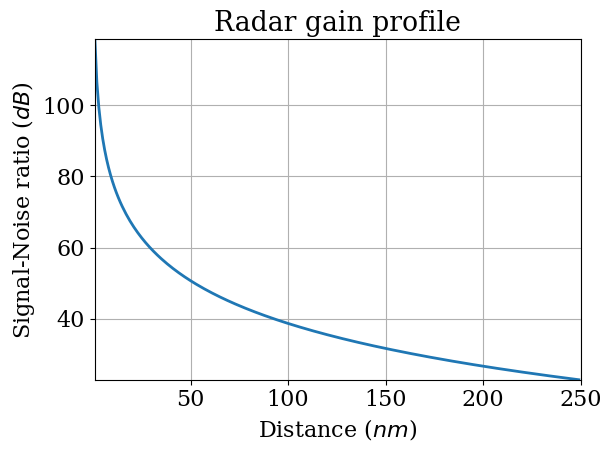

In [23]:
from math import radians
from rf.radar.component import Radar, Target
from rf.radar.equation import get_snrs
from rf.radar.chart import plot_snrs

# Parâmetro do alvo
target = Target(
    rcs = 1.3                                  # [m^2] => 2 m^2
)

# Parâmetros do radar
radar = Radar(
    peak_power=19.9e3,                        # [W]     => 19.9 KW
    antenna_gain=15,                         # [dB]    => 15 dB
    frequency= 1.4e6,                        # [Hz]    => 1400 MHz
    noise_figure=6,                          # [dB]    => 6 dB
    band_width=1.0e6,                        # [Hz]    => 1.00 MHz
    pulse_width=400e-6,                      # [s]     => 800 usec
    pulse_repetition=500,                    # [Hz]    => 500 Hz
    beam_width=radians(1.3),                 # [rad]   => 1.3 degrees
    angular_velocity=radians(6*360)/60.0 # [rad/s] => 6 rpm 
)

# Parâmetros adicionais
losses = 15                                  # 15 dB

from rf.radar.chart import plot_snrs

figure, _ = plot_snrs(
    1.0, 250, 1.0,
    radar,
    target,
    losses,
)